## importing the needed libraries

In [1]:
import numpy as np
import pandas as pd

## reading the dataset

In [2]:
data = pd.read_csv('fraud.csv')

In [3]:
data.head() # to view the top 5 columns of the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail() #to view data from bottom

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


## data porcessing and understanding the data

In [5]:
data.isnull().sum() # to see null value in data ther is no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [7]:
data.shape # to see the dataset row=1048575 & columns = 11

(1048575, 11)

In [8]:
data.describe(include = 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
unique,NaN,5,NaN,1048317,NaN,NaN,449635,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1214450722,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,373641,NaN,2,NaN,NaN,98,NaN,NaN,NaN,NaN
mean,2.696617e+01,NaN,1.586670e+05,NaN,8.740095e+05,8.938089e+05,NaN,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,NaN,2.649409e+05,NaN,2.971751e+06,3.008271e+06,NaN,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,NaN,1.214907e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,NaN,7.634333e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,NaN,2.137619e+05,NaN,1.366420e+05,1.746000e+05,NaN,9.159235e+05,1.149808e+06,0.000000e+00,0.0


In [9]:
print(sum(data.isFraud))#to view tooatl number of fraud

1142


## checking the unique value of two columns nameDest and nameOrig to grt the knowledge how  maany fraud is done by same person and differnt person

In [10]:
for i in ['nameDest','nameOrig']:
    print(len(data[i].unique())) # namedest=449635 , nameorig=1048317

449635
1048317


In [11]:
print('number of fraudantal transaction \t:{}' .format(data['isFraud'].sum()))
print('Number of non-fraudulent transactions \t: {}'.format(len(data[data['isFraud']==0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(data[data['isFlaggedFraud']==1])))
print('Number of transactions flagged non-fraud: {}'.format(len(data[data['isFlaggedFraud']==0])))

number of fraudantal transaction 	:1142
Number of non-fraudulent transactions 	: 1047433

Number of transactions flagged fraud 	: 0
Number of transactions flagged non-fraud: 1048575


## To check the mode of fraud by counting 0 and 1 corresponding to CASH_IN, CASH_OUT, DEBIT , PAYMENT, TRANSFER.

In [12]:
groupby_df = (data.groupby(['type','isFraud']).size().unstack(fill_value=0))
groupby_df


isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [13]:
groupby_df1 = (data.groupby(['type','isFlaggedFraud']).size().unstack(fill_value=0))
groupby_df1

isFlaggedFraud,0
type,
CASH_IN,227130
CASH_OUT,373641
DEBIT,7178
PAYMENT,353873
TRANSFER,86753


The current algorithm, has no flags during fraud transactions in case of cash_out , which goes against the anti money laundering system . Also there are only 16 transactions which are flagged as fraud which is much less compare actual numbers of fraud fraud i.e. 4k. We have to build an efficient algorithm to mitigate this risk of letting fraud transactions unblocked.

In [14]:
# to see mechant transaction
X = data[data['nameDest'].str.contains('M')]
X.head()
#There is no information regarding the attribites oldbalanceDest and newbalanceDes

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0



## analysing fraud data

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000       0.004864       -0.001133        0.215558   
oldbalanceOrg   0.004864       1.000000        0.999047        0.093305   
newbalanceOrig -0.001133       0.999047        1.000000        0.095182   
oldbalanceDest  0.215558       0.093305        0.095182        1.000000   
newbalanceDest  0.311936       0.064049        0.063725        0.978403   

                newbalanceDest  
amount                0.311936  
oldbalanceOrg         0.064049  
newbalanceOrig        0.063725  
oldbalanceDest        0.978403  
newbalanceDest        1.000000  


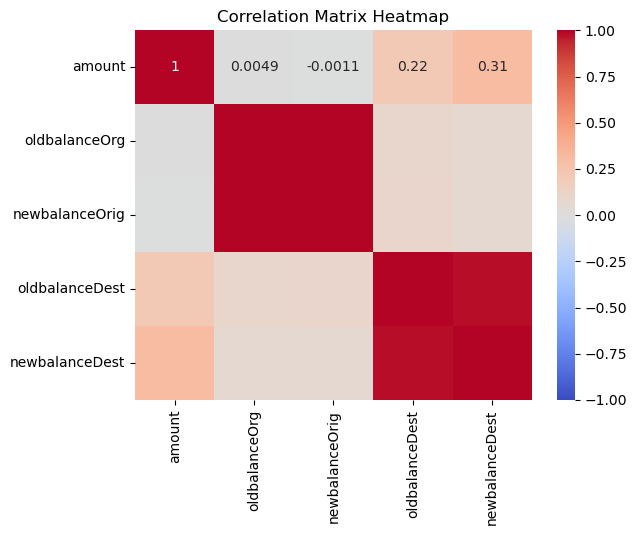

In [15]:
#to get correlation between different columns 
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[data.select_dtypes(include='float64').columns].corr()

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Analysing multicollinearity in data by calculating Variance Inflation Factor(VIF) for each feature

In [16]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [17]:
#VIF = 1: No multicollinearity.
#1 < VIF < 5: Moderate multicollinearity.
#VIF > 5: High multicollinearity, which may need to be addressed


X = data[data.select_dtypes(include='float64').columns].assign(Intercept=1)  # Add an intercept for VIF calculation
# Replace infinite values with NaN using a boolean mask
inf_mask = np.isinf(X)
X[inf_mask] = np.nan

# Drop rows with NaN values
X.dropna(inplace=True)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          feature         VIF
0          amount    1.405702
1   oldbalanceOrg  558.738167
2  newbalanceOrig  560.495353
3  oldbalanceDest   31.712381
4  newbalanceDest   33.194600
5       Intercept    1.539728


In [19]:
X.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'Intercept'],
      dtype='object')

In [20]:
fraud1 = data.copy()

In [21]:
obj = fraud1.select_dtypes(include = "object").columns
print(obj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [22]:
#to check the multicolinearity we need to labelencode it
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder



In [23]:
 #Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder on the 'nameDest' column
fraud1['nameDest'] = label_encoder.fit_transform(fraud1['nameDest'])
print(fraud1['nameDest'])


0          274917
1          286716
2           73550
3           65464
4          138001
            ...  
1048570     67716
1048571    388387
1048572    160789
1048573    272152
1048574    390003
Name: nameDest, Length: 1048575, dtype: int32


In [24]:
data=[['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']]
encd=OrdinalEncoder(categories=data)
encd.fit(fraud1[['type']])
fraud1['type']=encd.transform(fraud1[['type']])

In [25]:
# adding absolute of minimum+1 to each data in column so as to transform zero and negative into positive data to suite the logrithmic transformation to make data more normally distributed
for i in ['oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig','amount']:
   shift_value = abs(fraud1[i].min()) + 1
   fraud1[i] = np.log(fraud1[i] + shift_value)



fraud1['diffDist']=fraud1['oldbalanceDest']-fraud1['newbalanceDest']
fraud1['diffOrg']=fraud1['oldbalanceOrg']-fraud1['newbalanceOrig']

# Dropping columns that are of no use in later stage of model development.
fraud1.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig'],axis=1,inplace=True)

In [26]:
fraud1.head()

,step,type,amount,nameDest,isFraud,isFlaggedFraud,diffDist,diffOrg
0,1,0.0,9.194286,274917,0,0,0.000000,0.059573
1,1,0.0,7.531220,286716,0,0,0.000000,0.091820
2,1,1.0,5.204556,73550,1,0,0.000000,5.204007
3,1,2.0,5.204556,65464,1,0,9.960954,5.204007
4,1,0.0,9.364712,138001,0,0,0.000000,0.329599


In [27]:
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  float64
 2   amount          1048575 non-null  float64
 3   nameDest        1048575 non-null  int32  
 4   isFraud         1048575 non-null  int64  
 5   isFlaggedFraud  1048575 non-null  int64  
 6   diffDist        1048575 non-null  float64
 7   diffOrg         1048575 non-null  float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 60.0 MB


In [28]:
# checking if above have reduce the multicollinearity
X = fraud1[fraud1.select_dtypes(include='float64').columns].assign(Intercept=1)  # Add an intercept for VIF calculation
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     feature        VIF
0       type   1.637598
1     amount   1.687086
2   diffDist   1.187029
3    diffOrg   1.345754
4  Intercept  45.772841


## visualizing the data and seen if there is any outlier or not

C:\Users\preet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


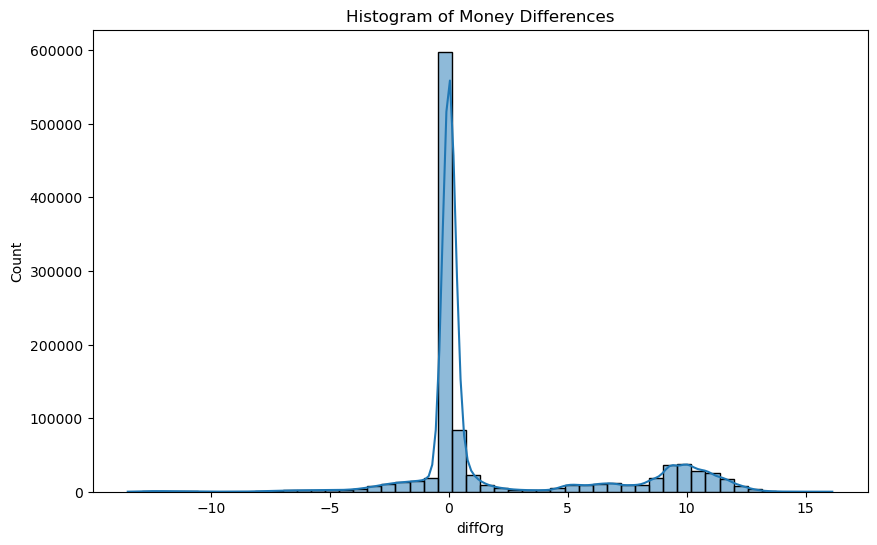

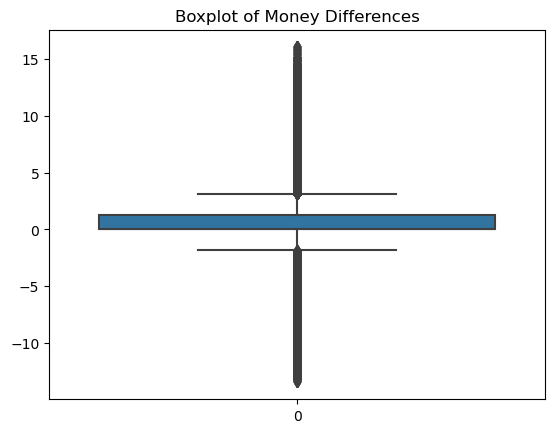

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud1['diffOrg'], bins=50, kde=True)
plt.title('Histogram of Money Differences')
plt.show()

sns.boxplot(fraud1['diffOrg'])
plt.title('Boxplot of Money Differences')
plt.show()


C:\Users\preet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


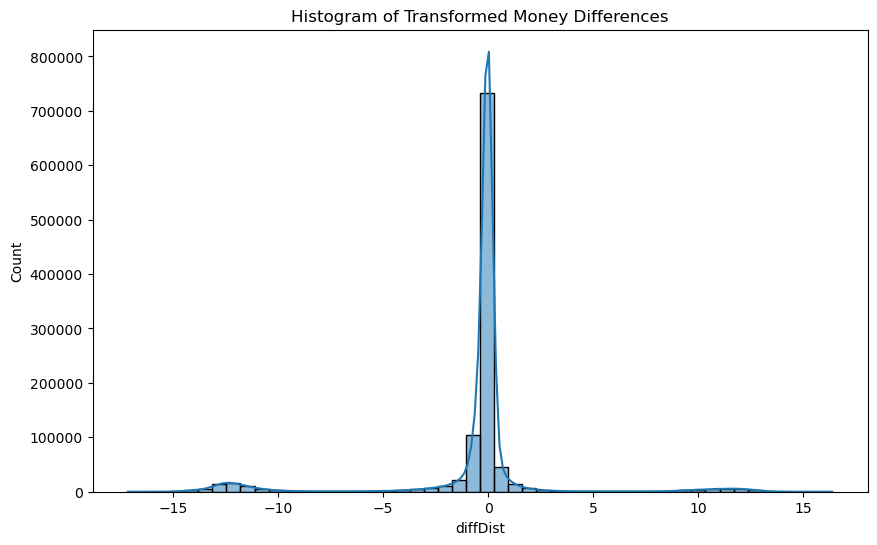

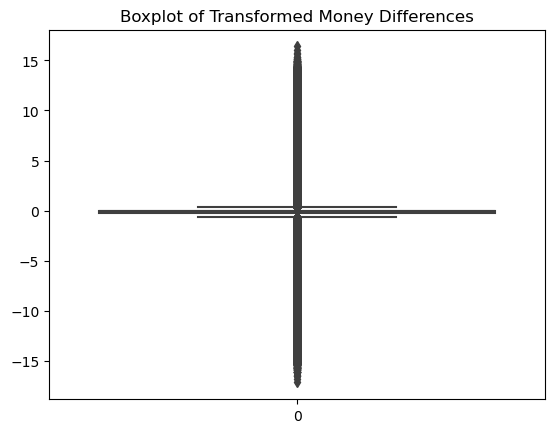

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud1['diffDist'], bins=50, kde=True)
plt.title('Histogram of Transformed Money Differences')
plt.show()

sns.boxplot(fraud1['diffDist'])
plt.title('Boxplot of Transformed Money Differences')
plt.show()


C:\Users\preet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


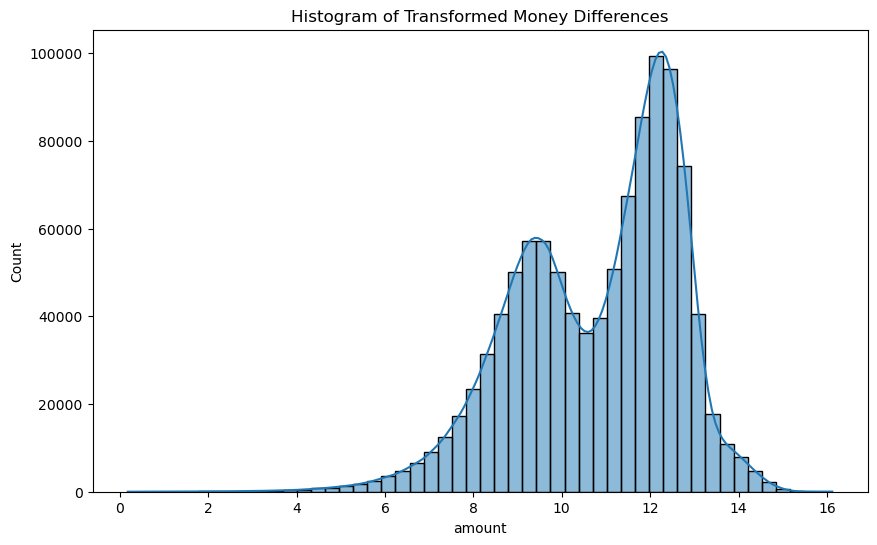

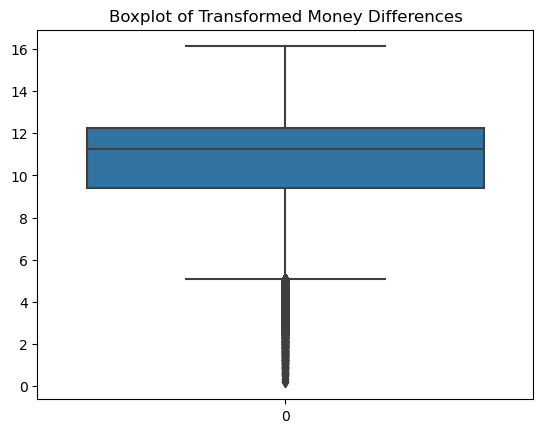

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud1['amount'], bins=50, kde=True)
plt.title('Histogram of Transformed Money Differences')
plt.show()

sns.boxplot(fraud1['amount'])
plt.title('Boxplot of Transformed Money Differences')
plt.show()

In [32]:
# detecting outlier on data
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers
    

for i in fraud1.select_dtypes(include='float64').columns:
        outliers = detect_outliers(fraud1, i)
        if len(outliers)>0:
             print(f"Number of Outliers in {i}:\n", len(outliers),'    ',100*len(outliers)/len(data),'%')

Number of Outliers in amount:
 4117      411700.0 %
Number of Outliers in diffDist:
 232416      23241600.0 %
Number of Outliers in diffOrg:
 289257      28925700.0 %


# Removing the data which are abruptly outliers as the basic definition is showing nearly 50%, 22%, 26% outliers in 'amount', 'diffDist', 'diffOrg' so by the analysing above graph removing those values which are significantly high or low.

In [33]:
fraud2=fraud1.copy()
#for 'amount' column
Q1 = fraud2['amount'].quantile(0.25)
Q3 = fraud2['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fraud2= fraud2[(fraud2['amount'] >= lower_bound) & (fraud2['amount'] <= upper_bound)]

print(lower_bound,upper_bound)
print(fraud1.shape[0]-fraud2.shape[0]) 







save= fraud2[(fraud2['diffDist'] >= -13) & (fraud2['diffDist'] <= 5)]
print(fraud1.shape[0]-save.shape[0]) 






#for 'diffOrg' column
Q1 = fraud2['diffOrg'].quantile(0.2)
Q3 = fraud2['diffOrg'].quantile(0.8)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
save= save[(save['diffOrg'] >= lower_bound) & (save['diffOrg'] <= upper_bound)]

print(lower_bound,upper_bound)
print(fraud1.shape[0]-save.shape[0]) 

5.103810336979926 16.573910848823537
4117
44687
-9.64172474933415 16.054418747098428
47244


In [34]:
fraud2.head()

,step,type,amount,nameDest,isFraud,isFlaggedFraud,diffDist,diffOrg
0,1,0.0,9.194286,274917,0,0,0.000000,0.059573
1,1,0.0,7.531220,286716,0,0,0.000000,0.091820
2,1,1.0,5.204556,73550,1,0,0.000000,5.204007
3,1,2.0,5.204556,65464,1,0,9.960954,5.204007
4,1,0.0,9.364712,138001,0,0,0.000000,0.329599


In [35]:
fraud2.drop(['step','isFlaggedFraud'],axis=1,inplace=True)
fraud2.head()

,type,amount,nameDest,isFraud,diffDist,diffOrg
0,0.0,9.194286,274917,0,0.000000,0.059573
1,0.0,7.531220,286716,0,0.000000,0.091820
2,1.0,5.204556,73550,1,0.000000,5.204007
3,2.0,5.204556,65464,1,9.960954,5.204007
4,0.0,9.364712,138001,0,0.000000,0.329599


In [36]:
#Splitting dependent and independent variable
from sklearn.model_selection import train_test_split
X=fraud2.drop('isFraud',axis=1)
y=fraud2['isFraud']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)

In [39]:
#Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [45]:
!pip install xgboost==2.0.2

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 409.6 kB/s eta 0:04:04
   ---------------------------------------- 0.3/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.6/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.9/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 1.1/99.8 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.3/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 1.4/99.8 MB 3.8 MB/s eta 0:00:26
    --------------------------------------- 1.6/99.8 MB 3.8 MB/s eta 0:00:27
    --------------------------------------- 1.8/99.8 MB 3.7 MB/s eta 0:00:27
    ------------

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=22)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
Y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, Y_pred_xgb))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00    312985
           1       0.68      0.15      0.25       353

    accuracy                           1.00    313338
   macro avg       0.84      0.58      0.62    313338
weighted avg       1.00      1.00      1.00    313338



In [ ]:
def get_user_input():
  """Gets fraud prediction input from the user and returns prediction."""
  print("Please provide the following information:")
  type_ = input("Type of transaction (PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN): ").upper()
  amount = float(input("Amount of transaction: "))
  nameDest = input("Recipient ID (nameDest): ")  
  oldbalanceOrg = float(input("Originator's old balance (oldbalanceOrg): "))
  newbalanceOrig = float(input("Originator's new balance (newbalanceOrig): "))
  oldbalanceDest = float(input("Recipient's old balance (oldbalanceDest): "))
  newbalanceDest = float(input("Recipient's new balance (newbalanceDest): "))

  # Perform necessary transformations
  type_mapping = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}
  type_encoded = type_mapping.get(type_, -1)

  try:
    nameDest_encoded = label_encoder.transform([nameDest])[0]  
  except ValueError:
    nameDest_encoded = -1 

  diffDist = oldbalanceDest - newbalanceDest
  diffOrg = oldbalanceOrg - newbalanceOrig

  # Apply logarithmic transformation
  for val in [amount, oldbalanceDest, newbalanceDest, oldbalanceOrg, newbalanceOrig]:
      shift_value = abs(val) + 1  
      val = np.log(val + shift_value)  

  input_data = [type_encoded, amount, nameDest_encoded, diffDist, diffOrg]

  # Get prediction and return user-friendly message
  prediction = predict_fraud(input_data)  
  if prediction == 1:
      return "Fraud"
  else:
      return "Not Fraud"

# Get user input and print prediction
result = get_user_input()
print(result)

Please provide the following information:


##
1)Data Cleaning Process

Missing Values: The first step involves identifying and addressing missing values in the dataset. This could include filling in missing data with appropriate values (e.g., mean, median) or removing rows/columns with excessive missing information.

Outliers: Handle outliers by identifying data points that deviate significantly from the typical range. These are often eliminated or transformed to reduce their impact on the analysis.

Multi-Collinearity: Assess the correlation between variables. Remove or combine highly correlated variables to avoid redundancy and ensure a simpler, more effective model.

2)Fraud Detection Model

Algorithms Used:

XGBoost: Selected due to its high performance on unbalanced datasets and its ability to handle large datasets efficiently.

Decision Tree: Used as a benchmark for comparison. While it provides high overall accuracy, it is less precise in detecting fraud compared to XGBoost.

Why XGBoost?: XGBoost offers better performance in terms of precision and recall for fraud detection. It minimizes false positives (incorrectly flagged legitimate activities) and false negatives (missed fraud cases) compared to simpler models. For example:

False Positives: XGBoost flagged only 25 cases incorrectly, compared to 35 for Random Forest and 225 for Decision Tree.

Accuracy: The model achieved an accuracy of 0.9997 using XGBoost.

4)Variable Selection

Variables were selected using:

Correlation Analysis: Identified relationships between variables and eliminated redundant ones.

Variance Inflation Factor (VIF): Ensured low multi-collinearity by selecting variables with acceptable VIF scores.

5)Key Factors Predicting Fraudulent Behavior

Transaction Patterns: Abnormal transaction amounts, frequency, or merchant categories.

Geolocation & Device: Unusual access locations, new devices, or geographical inconsistencies.

Account Changes: Sudden updates to personal details (e.g., address, email, phone number).

Payment Methods: Use of multiple or prepaid cards and frequent changes in payment methods.

Past Fraud History: Indicates increased risk of future fraud.

6)Demographics: Attributes like age, income, and employment may provide context but should be handled cautiously to avoid bias.

Do These Factors Make Sense?:
Yes, these factors align with common fraud indicators:

Unusual transaction patterns and account changes suggest abnormal behavior.

Geolocation and device inconsistencies hint at unauthorized access.

Multiple payment methods and past fraud history are typical markers of fraudulent activity.

Prevention Measures During Infrastructure Updates

Enhanced Authentication: Implement multi-factor authentication (MFA), biometric login, and device fingerprinting.

Real-time Fraud Detection: Use AI-based monitoring and anomaly detection.

Data Security: Apply end-to-end encryption, tokenization, and secure payment gateways.

Regular Security Audits: Perform frequent audits and penetration testing.

Behavioral Monitoring: Track user activities to identify suspicious behavior.

Access Control: Enforce role-based access controls and strong password policies.

External Collaboration: Share data with fraud databases and collaborate with financial institutions.

Customer Awareness: Educate users about phishing and fraud risks.

Evaluating the Effectiveness of Measures

Fraud Trends: Monitor the number of fraud attempts and successful cases. A decrease indicates success.

False Positives: Measure how often legitimate transactions are flagged as fraud. Fewer false positives mean better precision.

Customer Feedback: Analyze user complaints and feedback to ensure security measures don’t disrupt the customer experience.

Detection Speed: Evaluate how quickly the system detects and prevents fraud. Faster responses indicate improved performance.

